In [1]:
import numpy as np
import time
import datetime

from pathlib import Path
from seaborn import heatmap

In [2]:
from simulations.distributions import interaction_dirichlet_multinomial

In [3]:
rate = 2
entropy = 42
concentration = 1.0
number_samples = int(1e5)
D = number_samples

In [4]:
seed = np.random.SeedSequence(entropy)

In [5]:
frequencies = np.ones(3)/3.
S = frequencies.size

In [6]:
interaction_matrix = np.array([[1,0.1,-0.1],[0.1,1,0.1],[-0.1,-0.1,1]])

## IDM - Interaction Dirichlet-Multinomial (concentration 1)

Thresholding post-link function

In [7]:
def IDM_simulation(concentration, frequencies, interaction_matrix, number_cells, 
                      seed, number_samples, post_link=lambda x: np.maximum(x,0)):
    """Different from other notebook that uses default expnential post-link function
    exponential is only default b/c it is smooth and makes similarity to logistic normal
    more obvious, so other people will like it more. I like this post-link function better though."""
    rng = np.random.default_rng(seed)

    results = [interaction_dirichlet_multinomial(concentration, frequencies, 
                                                 interaction_matrix, number_cells, 
                                                 rng, post_link=post_link) 
               for sample in range(number_samples)]
    
    results = [result.reshape((1,-1)) for result in results]
    results = np.concatenate(results, axis=0)
    # shape of results is now (number_droplets, number_strains)
    return results

Also since interactions are more obvious with this version than with exponential version, using exponential as default post-link means hypothesis tests will have more difficult job for inferring interactions.

In [8]:
start_time = time.time()
results = IDM_simulation(concentration=concentration,
                interaction_matrix=interaction_matrix,
                number_cells=2, seed=seed, 
                number_samples=number_samples,
                frequencies=frequencies)
runtime = time.time() - start_time

runtime_string = str(datetime.timedelta(seconds=runtime))
print('Runtime was {} in Hours:Minutes:Seconds.'.format(runtime_string))

Runtime was 0:00:13.911323 in Hours:Minutes:Seconds.


In [9]:
idm_nonzero = (results > 0).T

idm_cooccurrence = np.zeros((S,S))

idm_cooccurrence[0,0] = np.sum(idm_nonzero[0,:] & ~idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[1,1] = np.sum(~idm_nonzero[0,:] & idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[2,2] = np.sum(~idm_nonzero[0,:] & ~idm_nonzero[1,:] & idm_nonzero[2,:])

idm_cooccurrence[0,1] = np.sum(idm_nonzero[0,:] & idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[0,2] = np.sum(idm_nonzero[0,:] & ~idm_nonzero[1,:] & idm_nonzero[2,:])

idm_cooccurrence[1,2] = np.sum(~idm_nonzero[0,:] & idm_nonzero[1,:] & idm_nonzero[2,:])

idm_cooccurrence /= D
idm_cooccurrence

array([[0.16395, 0.18391, 0.15134],
       [0.     , 0.14484, 0.16463],
       [0.     , 0.     , 0.19133]])

<AxesSubplot:>

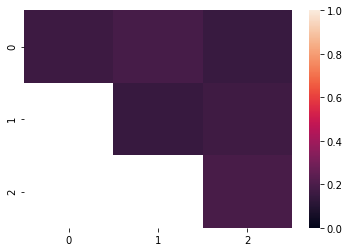

In [10]:
mask = ~np.triu(np.ones_like(idm_cooccurrence, dtype=bool))
heatmap(idm_cooccurrence, mask=mask, vmin=0., vmax=1.)

## Stronger interactions

In [11]:
interaction_matrix = np.array([[1,0.25,-0.25],[0.25,1,0.25],[-0.25,-0.25,1]])
interaction_matrix

array([[ 1.  ,  0.25, -0.25],
       [ 0.25,  1.  ,  0.25],
       [-0.25, -0.25,  1.  ]])

In [12]:
start_time = time.time()
results = IDM_simulation(concentration=concentration,
                interaction_matrix=interaction_matrix,
                number_cells=2, seed=seed, 
                number_samples=number_samples,
                frequencies=frequencies)
runtime = time.time() - start_time

runtime_string = str(datetime.timedelta(seconds=runtime))
print('Runtime was {} in Hours:Minutes:Seconds.'.format(runtime_string))

Runtime was 0:00:13.847430 in Hours:Minutes:Seconds.


In [13]:
idm_nonzero = (results > 0).T

idm_cooccurrence = np.zeros((S,S))

idm_cooccurrence[0,0] = np.sum(idm_nonzero[0,:] & ~idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[1,1] = np.sum(~idm_nonzero[0,:] & idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[2,2] = np.sum(~idm_nonzero[0,:] & ~idm_nonzero[1,:] & idm_nonzero[2,:])

idm_cooccurrence[0,1] = np.sum(idm_nonzero[0,:] & idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[0,2] = np.sum(idm_nonzero[0,:] & ~idm_nonzero[1,:] & idm_nonzero[2,:])

idm_cooccurrence[1,2] = np.sum(~idm_nonzero[0,:] & idm_nonzero[1,:] & idm_nonzero[2,:])

idm_cooccurrence /= D
idm_cooccurrence

array([[0.15729, 0.20564, 0.12944],
       [0.     , 0.12553, 0.151  ],
       [0.     , 0.     , 0.2311 ]])

<AxesSubplot:>

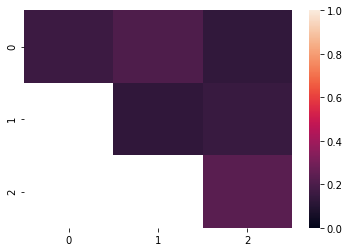

In [14]:
mask = ~np.triu(np.ones_like(idm_cooccurrence, dtype=bool))
heatmap(idm_cooccurrence, mask=mask, vmin=0., vmax=1.)

## Crank up the interactions further

In [15]:
interaction_matrix = np.array([[1,0.5,-0.5],[0.5,1,0.5],[-0.5,-0.5,1]])
interaction_matrix

array([[ 1. ,  0.5, -0.5],
       [ 0.5,  1. ,  0.5],
       [-0.5, -0.5,  1. ]])

In [16]:
start_time = time.time()
results = IDM_simulation(concentration=concentration,
                interaction_matrix=interaction_matrix,
                number_cells=2, seed=seed, 
                number_samples=number_samples,
                frequencies=frequencies)
runtime = time.time() - start_time

runtime_string = str(datetime.timedelta(seconds=runtime))
print('Runtime was {} in Hours:Minutes:Seconds.'.format(runtime_string))

Runtime was 0:00:14.059474 in Hours:Minutes:Seconds.


In [17]:
idm_nonzero = (results > 0).T

idm_cooccurrence = np.zeros((S,S))

idm_cooccurrence[0,0] = np.sum(idm_nonzero[0,:] & ~idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[1,1] = np.sum(~idm_nonzero[0,:] & idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[2,2] = np.sum(~idm_nonzero[0,:] & ~idm_nonzero[1,:] & idm_nonzero[2,:])

idm_cooccurrence[0,1] = np.sum(idm_nonzero[0,:] & idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[0,2] = np.sum(idm_nonzero[0,:] & ~idm_nonzero[1,:] & idm_nonzero[2,:])

idm_cooccurrence[1,2] = np.sum(~idm_nonzero[0,:] & idm_nonzero[1,:] & idm_nonzero[2,:])

idm_cooccurrence /= D
idm_cooccurrence

array([[0.14562, 0.2247 , 0.1094 ],
       [0.     , 0.11168, 0.12807],
       [0.     , 0.     , 0.28053]])

<AxesSubplot:>

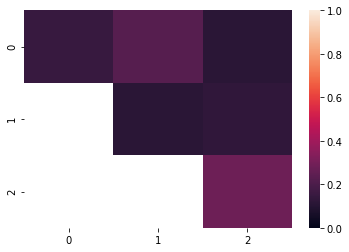

In [18]:
mask = ~np.triu(np.ones_like(idm_cooccurrence, dtype=bool))
heatmap(idm_cooccurrence, mask=mask, vmin=0., vmax=1.)

## Now at ridiculously high level

In [19]:
interaction_matrix = np.array([[1,1,-1],[1,1,1],[-1,-1,1]])
interaction_matrix

array([[ 1,  1, -1],
       [ 1,  1,  1],
       [-1, -1,  1]])

In [20]:
start_time = time.time()
results = IDM_simulation(concentration=concentration,
                interaction_matrix=interaction_matrix,
                number_cells=2, seed=seed, 
                number_samples=number_samples,
                frequencies=frequencies)
runtime = time.time() - start_time

runtime_string = str(datetime.timedelta(seconds=runtime))
print('Runtime was {} in Hours:Minutes:Seconds.'.format(runtime_string))

Runtime was 0:00:14.501161 in Hours:Minutes:Seconds.


In [21]:
idm_nonzero = (results > 0).T

idm_cooccurrence = np.zeros((S,S))

idm_cooccurrence[0,0] = np.sum(idm_nonzero[0,:] & ~idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[1,1] = np.sum(~idm_nonzero[0,:] & idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[2,2] = np.sum(~idm_nonzero[0,:] & ~idm_nonzero[1,:] & idm_nonzero[2,:])

idm_cooccurrence[0,1] = np.sum(idm_nonzero[0,:] & idm_nonzero[1,:] & ~idm_nonzero[2,:])
idm_cooccurrence[0,2] = np.sum(idm_nonzero[0,:] & ~idm_nonzero[1,:] & idm_nonzero[2,:])

idm_cooccurrence[1,2] = np.sum(~idm_nonzero[0,:] & idm_nonzero[1,:] & idm_nonzero[2,:])

idm_cooccurrence /= D
idm_cooccurrence

array([[0.11844, 0.23647, 0.08945],
       [0.     , 0.12134, 0.09031],
       [0.     , 0.     , 0.34399]])

<AxesSubplot:>

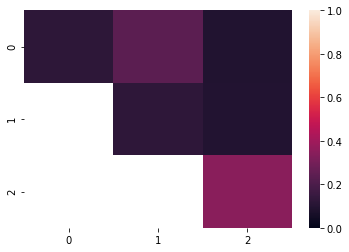

In [22]:
mask = ~np.triu(np.ones_like(idm_cooccurrence, dtype=bool))
heatmap(idm_cooccurrence, mask=mask, vmin=0., vmax=1.)